<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# SP500 Descriptive Analysis Guide


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

## Purpose

> This code will create a visualization that represents daily volatility of sectors within the S&P500 Index. This Notebook is a guide for how to wrangle and format data in a uniform way so it can be replicated by multiple team members for their assigned sectors within the S&P500 Index. Using the high and low price for the day, calculate the difference(volatility) as a percent. Then get the average volatility for the month. Compare the volatility against the other sectors and evaluate for correlation, divergence and which sectors appear to have the most volatility.

# Import Packages

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.dates as mdates

In [2]:
# Israel Data
sp_materials = pd.read_csv(r"../Data/sp_materials_IG.csv")

In [3]:
sp_utilities = pd.read_csv(r"../Data/sp_utilities_IG.csv")

In [4]:
sp_real_estate = pd.read_csv(r"../Data/sp_real_estate_IG.csv")

### Inspecting the data to see what wrangling needs to be done.

In [5]:
sp_materials.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2023,471.02,473.78,474.90,469.18,142.97M,-1.12%
1,05/30/2023,476.37,479.17,479.32,472.87,80.34M,-0.59%
2,05/26/2023,479.21,479.30,482.37,477.26,70.83M,0.42%
3,05/25/2023,477.22,478.85,479.46,474.69,78.10M,-0.38%
4,05/24/2023,479.04,483.45,483.45,478.16,75.35M,-1.12%


In [6]:
sp_materials.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2615,01/08/2013,244.34,243.80,244.80,242.57,NaN,0.18%
2616,01/07/2013,243.90,244.09,244.13,242.56,NaN,-0.20%
2617,01/04/2013,244.39,241.82,244.69,241.82,98.22M,1.18%
2618,01/03/2013,241.55,243.18,243.99,240.79,107.44M,-0.68%
2619,01/02/2013,243.21,238.28,244.05,238.28,133.78M,2.35%


In [7]:
# We have a good 10 years of data for sp_materials

In [8]:
sp_utilities.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2023,327.97,325.31,329.35,323.00,182.05M,0.96%
1,05/30/2023,324.86,326.58,328.37,324.47,113.20M,-0.39%
2,05/26/2023,326.13,325.94,326.39,322.96,98.04M,-0.10%
3,05/25/2023,326.45,330.08,330.08,324.25,104.56M,-1.38%
4,05/24/2023,331.01,332.83,333.67,330.48,90.54M,-0.63%


In [9]:
sp_utilities.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2614,01/08/2013,179.45,179.63,179.86,178.76,NaN,-0.18%
2615,01/07/2013,179.78,181.55,181.55,179.61,NaN,-1.14%
2616,01/04/2013,181.86,180.91,181.92,180.89,63.00M,0.54%
2617,01/03/2013,180.88,180.84,181.49,180.42,69.77M,0.00%
2618,01/02/2013,180.88,178.31,181.11,178.31,91.66M,1.81%


In [10]:
# Utilities has 10 years of data

In [11]:
sp_real_estate.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2023,225.65,224.55,226.00,222.94,167.82M,0.68%
1,05/30/2023,224.13,225.06,227.10,223.74,61.39M,0.30%
2,05/26/2023,223.45,221.43,223.90,220.49,53.55M,1.18%
3,05/25/2023,220.85,221.39,222.48,219.31,68.33M,0.27%
4,05/24/2023,220.26,224.57,224.61,219.98,56.90M,-2.22%


In [12]:
sp_real_estate.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2613,01/08/2013,153.77,153.92,154.15,153.20,NaN,-0.10%
2614,01/07/2013,153.92,153.52,154.06,153.18,NaN,0.19%
2615,01/04/2013,153.63,152.96,153.67,152.74,33.32M,0.48%
2616,01/03/2013,152.90,153.13,153.73,152.63,39.34M,-0.29%
2617,01/02/2013,153.35,151.38,153.67,151.38,40.61M,1.38%


In [13]:
# Real Estate has 10 years of data

# Step 1: Wrangle the data

In [14]:
# Here are the wrangline objectives

# We need the Date in numeric format.

# Create a column showing the difference between High and Low as a percent.

# Create a new df with a '_W' at the end to indicate Wrangling with only necesary columns

# Isolate Date range for June 2022 to June 2023

# Parse the Dates 

# Group the data by month and calculate the mean

# Create visualization for individual dataset

In [15]:
# Converting dates to datetime format
sp_materials['Date'] = pd.to_datetime(sp_materials['Date'], format='%m/%d/%Y')
sp_utilities['Date'] = pd.to_datetime(sp_utilities['Date'], format='%m/%d/%Y')
sp_real_estate['Date'] = pd.to_datetime(sp_real_estate['Date'], format='%m/%d/%Y')

In [16]:
# Create Column showing the difference beween the Open and Close price !!!as a percentage!!!
# ** The percent changed is based on the opening price for the session

# All of these columns will eventually be merged so we need to add a suffix to the colunms

sp_materials['diff_sp_mat'] = ((sp_materials['High'] - sp_materials['Low'])/ sp_materials['Low']) * (100)
sp_utilities['diff_sp_utilities'] = ((sp_utilities['High'] - sp_utilities['Low'])/ sp_utilities['Low']) * (100)
sp_real_estate['diff_sp_real_estate'] = ((sp_real_estate['High'] - sp_real_estate['Low'])/ sp_real_estate['Low']) * (100)

In [17]:
sp_materials.head()

,Date,Price,Open,High,Low,Vol.,Change %,diff_sp_mat
0,2023-05-31,471.02,473.78,474.90,469.18,142.97M,-1.12%,1.219148
1,2023-05-30,476.37,479.17,479.32,472.87,80.34M,-0.59%,1.364011
2,2023-05-26,479.21,479.30,482.37,477.26,70.83M,0.42%,1.070695
3,2023-05-25,477.22,478.85,479.46,474.69,78.10M,-0.38%,1.004866
4,2023-05-24,479.04,483.45,483.45,478.16,75.35M,-1.12%,1.106324


In [18]:
sp_utilities.head()

,Date,Price,Open,High,Low,Vol.,Change %,diff_sp_utilities
0,2023-05-31,327.97,325.31,329.35,323.00,182.05M,0.96%,1.965944
1,2023-05-30,324.86,326.58,328.37,324.47,113.20M,-0.39%,1.201960
2,2023-05-26,326.13,325.94,326.39,322.96,98.04M,-0.10%,1.062051
3,2023-05-25,326.45,330.08,330.08,324.25,104.56M,-1.38%,1.797995
4,2023-05-24,331.01,332.83,333.67,330.48,90.54M,-0.63%,0.965263


In [19]:
sp_real_estate.head()

,Date,Price,Open,High,Low,Vol.,Change %,diff_sp_real_estate
0,2023-05-31,225.65,224.55,226.00,222.94,167.82M,0.68%,1.372567
1,2023-05-30,224.13,225.06,227.10,223.74,61.39M,0.30%,1.501743
2,2023-05-26,223.45,221.43,223.90,220.49,53.55M,1.18%,1.546555
3,2023-05-25,220.85,221.39,222.48,219.31,68.33M,0.27%,1.445443
4,2023-05-24,220.26,224.57,224.61,219.98,56.90M,-2.22%,2.104737


In [20]:
sp_materials_W = sp_materials[['Date', 'diff_sp_mat']]
sp_utilities_W = sp_utilities[['Date', 'diff_sp_utilities']]
sp_real_estate_W = sp_real_estate[['Date','diff_sp_real_estate']]

In [21]:
#### Take a look and make sure this is correct

In [22]:
sp_materials_W.head(2)

,Date,diff_sp_mat
0,2023-05-31,1.219148
1,2023-05-30,1.364011


In [23]:
sp_utilities_W.head(2)

,Date,diff_sp_utilities
0,2023-05-31,1.965944
1,2023-05-30,1.201960


In [24]:
sp_real_estate_W.head(2)

,Date,diff_sp_real_estate
0,2023-05-31,1.372567
1,2023-05-30,1.501743


In [25]:
# Assign the start and end dates we want to filter as a variable
start_date = pd.to_datetime('2018-06-01')
end_date = pd.to_datetime('2023-05-30')

In [26]:
# Use stand and end dates to trim the data for the desired uniform dates. 
sp_materials_W = sp_materials_W[(sp_materials_W['Date'] >= start_date) & (sp_materials_W['Date'] <= end_date)]

In [27]:
# Use stand and end dates to trim the data for the desired uniform dates. 
sp_utilities_W = sp_utilities_W[(sp_utilities_W['Date'] >= start_date) & (sp_utilities_W['Date'] <= end_date)]

In [28]:
# Use stand and end dates to trim the data for the desired uniform dates. 
sp_real_estate_W = sp_real_estate_W[(sp_real_estate_W['Date'] >= start_date) & (sp_real_estate_W['Date'] <= end_date)]

In [29]:
# Extract year and month
sp_materials_W['year_month'] = sp_materials_W['Date'].dt.strftime('%Y-%m')
#sp_materials_W.loc[:, 'year_month'] = sp_materials_W['Date'].dt.strftime('%Y-%m'), can avoid potential errors in the future

In [30]:
sp_materials_W.head(2)

,Date,diff_sp_mat,year_month
1,2023-05-30,1.364011,2023-05
2,2023-05-26,1.070695,2023-05


In [31]:
# Group the data by month and get the mean of the daily percent

sp_materials_mean = sp_materials_W.groupby('year_month')['diff_sp_mat'].mean()

In [32]:
# resetting the index corrects index to maintain column name integrity.
sp_materials_mean = sp_materials_mean.reset_index()
sp_materials_mean.head()

,year_month,diff_sp_mat
0,2018-06,1.177986
1,2018-07,1.072100
2,2018-08,1.109348
3,2018-09,1.010006
4,2018-10,1.916777


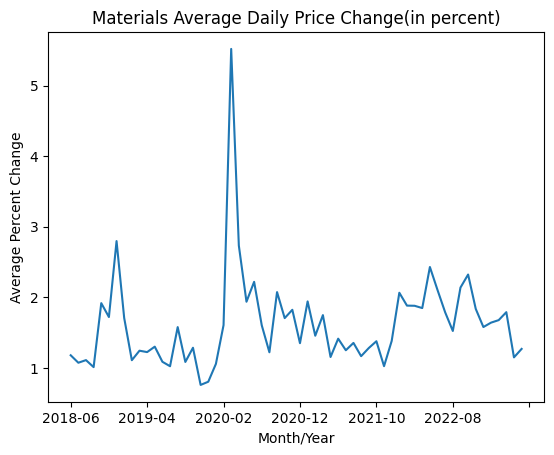

In [33]:
# Set the 'Year' column as the index

sp_materials_mean = sp_materials_mean.reset_index() # resetting the index corrects index to maintain column name integrity.
sp_materials_mean.set_index('year_month', inplace=True) # set_index assigns the date as the X axis

# Plotting the Inflation Data as a line graph
sp_materials_mean['diff_sp_mat'].plot() # This assigns the data to be plotted
plt.xlabel('Month/Year')
plt.ylabel('Average Percent Change')
plt.title('Materials Average Daily Price Change(in percent)')
plt.show()

In [34]:
sp_utilities_W = sp_utilities_W.reset_index()

In [35]:
# Extract year and month
sp_utilities_W['year_month'] = sp_utilities_W['Date'].dt.strftime('%Y-%m')

In [36]:
sp_utilities_W.head(2)

,index,Date,diff_sp_utilities,year_month
0,1,2023-05-30,1.201960,2023-05
1,2,2023-05-26,1.062051,2023-05


In [37]:
# Group the data by month and get the mean of the daily percent

sp_utilities_mean = sp_utilities_W.groupby('year_month')['diff_sp_utilities'].mean()

In [38]:
# resetting the index corrects index to maintain column name integrity.
sp_utilities_mean = sp_utilities_mean.reset_index()
sp_utilities_mean.head()

,year_month,diff_sp_utilities
0,2018-06,1.306953
1,2018-07,1.244638
2,2018-08,1.040203
3,2018-09,1.177992
4,2018-10,1.677990


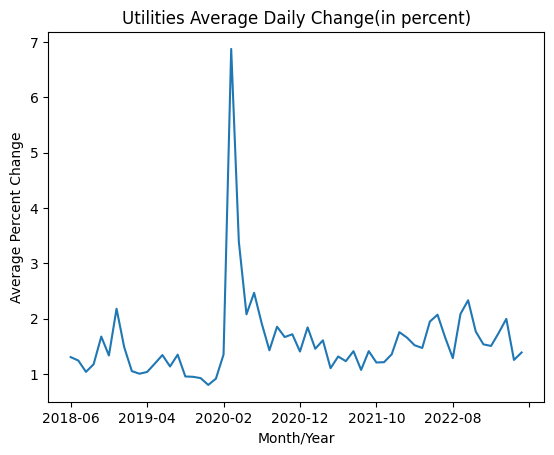

In [39]:
# Set the 'Year' column as the index

sp_utilities_mean = sp_utilities_mean.reset_index() # resetting the index corrects index to maintain column name integrity.
sp_utilities_mean.set_index('year_month', inplace=True) # set_index assigns the date as the X axis

# Plotting the Inflation Data as a line graph
sp_utilities_mean['diff_sp_utilities'].plot() # This assigns the data to be plotted
plt.xlabel('Month/Year')
plt.ylabel('Average Percent Change')
plt.title('Utilities Average Daily Change(in percent)')
plt.show()

In [40]:
# Extract year and month
sp_real_estate_W['year_month'] = sp_real_estate_W['Date'].dt.strftime('%Y-%m')

In [41]:
sp_real_estate_W.head(2)

,Date,diff_sp_real_estate,year_month
1,2023-05-30,1.501743,2023-05
2,2023-05-26,1.546555,2023-05


In [42]:
# Group the data by month and get the mean of the daily percent

sp_real_estate_mean = sp_real_estate_W.groupby('year_month')['diff_sp_real_estate'].mean()

In [43]:
# resetting the index corrects index to maintain column name integrity.
sp_real_estate_mean = sp_real_estate_mean.reset_index()
sp_real_estate_mean.head()

,year_month,diff_sp_real_estate
0,2018-06,1.057051
1,2018-07,1.108908
2,2018-08,0.896781
3,2018-09,1.024071
4,2018-10,1.706552


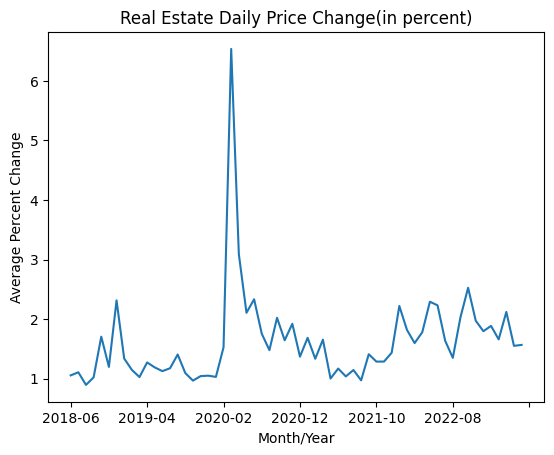

In [44]:
# Set the 'Year' column as the index

sp_real_estate_mean = sp_real_estate_mean.reset_index() # resetting the index corrects index to maintain column name integrity.
sp_real_estate_mean.set_index('year_month', inplace=True) # set_index assigns the date as the X axi

# Plotting the Inflation Data as a line graph
sp_real_estate_mean['diff_sp_real_estate'].plot() # This assigns the data to be plotted
plt.xlabel('Month/Year')
plt.ylabel('Average Percent Change')
plt.title('Real Estate Daily Price Change(in percent)')
plt.show()

In [45]:
# Merge materials data and IT data
all_1 = pd.merge(sp_materials_mean, sp_utilities_mean, on='year_month', suffixes=('_mat', '_util'))

In [46]:
# Merge all_1 with Consumer Staples Data
all_2 = pd.merge(all_1, sp_real_estate_mean, on='year_month',suffixes=('_all_1', '_RE'))

In [47]:
all_2.head()

,index_mat,diff_sp_mat,index_util,diff_sp_utilities,index,diff_sp_real_estate
year_month,,,,,,
2018-06,0,1.177986,0,1.306953,0,1.057051
2018-07,1,1.072100,1,1.244638,1,1.108908
2018-08,2,1.109348,2,1.040203,2,0.896781
2018-09,3,1.010006,3,1.177992,3,1.024071
2018-10,4,1.916777,4,1.677990,4,1.706552


In [90]:
# Select only necessary columnns for analysis
all_3 = all_2[['diff_sp_mat','diff_sp_utilities', 'diff_sp_real_estate']]

In [50]:
all_3.columns

Index(['diff_sp_mat', 'diff_sp_utilities', 'diff_sp_real_estate'], dtype='object')

In [93]:
all_3 = all_3.reset_index()
all_3.to_csv("../Data/all_3_Ig.csv", index = False)

In [87]:
all_3.head()

,year_month,diff_sp_mat,diff_sp_utilities,diff_sp_real_estate
0,2018-06,1.177986,1.306953,1.057051
1,2018-07,1.072100,1.244638,1.108908
2,2018-08,1.109348,1.040203,0.896781
3,2018-09,1.010006,1.177992,1.024071
4,2018-10,1.916777,1.677990,1.706552


In [120]:
merger_3 = pd.read_csv ("../Data/merger_3_IG.csv")
merger_3.head()

,year_month,Price_mat,Price_util,Price
0,2023-05,476.37,324.86,224.13
1,2023-05,476.37,324.86,223.45
2,2023-05,476.37,324.86,220.85
3,2023-05,476.37,324.86,220.26
4,2023-05,476.37,324.86,225.25


# Visualizing the combined data

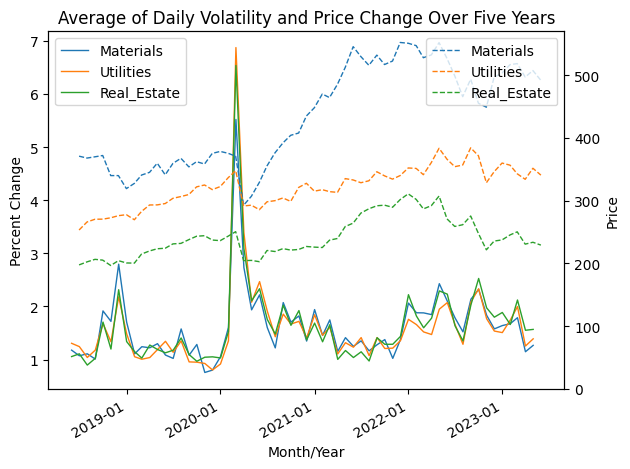

In [122]:
all_3 = all_3.reset_index()
merger_3 = merger_3.reset_index()

# Convert 'year_month' column to Timestamp objects
all_3['year_month'] = pd.to_datetime(all_3['year_month'])
merger_3['year_month'] = pd.to_datetime(merger_3['year_month'])

# Set the 'year_month' column as the index
all_3.set_index('year_month', inplace=True)
merger_3.set_index('year_month', inplace=True)

# Downsampling the merger_3 DataFrame to monthly intervals
merger_3_downsampled = merger_3.resample('M').mean()

# Sort the merger_3 DataFrame by 'year_month' column
merger_3.sort_values('year_month', inplace=True)

# Create the figure and axes
fig, ax1 = plt.subplots()

# Plotting the variables on the primary y-axis
ax1.plot(all_3['diff_sp_mat'], label='Materials', linewidth=1)
ax1.plot(all_3['diff_sp_utilities'], label='Utilities', linewidth=1)
ax1.plot(all_3['diff_sp_real_estate'], label='Real_Estate', linewidth=1)


# Set the labels and title for the primary y-axis
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Percent Change')
ax1.set_title('Average of Daily Volatility and Price Change Over Five Years')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plotting the variables on the secondary y-axis
ax2.plot(merger_3_downsampled['Price_mat'], label='Materials', linestyle='--', linewidth=1 )
ax2.plot(merger_3_downsampled['Price_util'], label='Utilities', linestyle='--', linewidth=1)
ax2.plot(merger_3_downsampled['Price'], label='Real_Estate', linestyle='--', linewidth=1)

# Set the labels and title for the primary y-axis
ax2.set_ylabel('Price')

# Adjust the y-axis scale for the 'Price' data
ax2.set_ylim(bottom=0)  # Set the minimum y-axis value to 0 or adjust as needed

# Format x-axis labels as desired (e.g., 'YYYY-MM')
date_format = mdates.DateFormatter('%Y-%m')
ax1.xaxis.set_major_formatter(date_format)

# Adjust the appearance of x-axis labels
fig.autofmt_xdate()

# Display the legend for both y-axes
ax1.legend(loc='upper left') 
ax2.legend(loc='upper right')

#Improves layout and spacing of the plot elements
plt.tight_layout()

# Show the plot
plt.show()
